In [66]:
import pandas as pd
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE, chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer
from matplotlib.animation import FuncAnimation

Flowchart

1.Data collection --> net, in-game data, individual player data (audience voice,audience graph in the future)

2.Data preprocessing --> A. Feature engineering by stata multi-linear regression and null hypothesis testing with p-                               value, f-test, chi-square test to select important features (+SOS)(control variable, how many roudns) (know sth about dependent variables factors)(variance inflation)(normal distrition is a must)(continuous variable, otherwise don't use linear regression) (log turn into normal)
                         B. Data transformation: coach data (only current data, not in the past and turn into                                     percentage win/lose)
                         C. Rebuild seed number: use "Teamrank" (like pagerank) to get the rank of entire participant                             teams
                         D. PCA (dont know totally about denpent variable factors)

3. Models --> A. Monte carlo simulation with weighted posibilities based on fg, fg2, fg3, violation, star coaches, star players, margin of winning, net ranking
              B. Svm with hyperparameter tunning
              
4. Model evaluation --> A. Random walk based on original seed number (1-16) (use this to compare with above model, New                            model need to surpass this random walk one)
                        B. Precision, recall, accuracy, latency, bias, variance for SVM main absolute percentage error

5. Use TeamRank, NET, Seed, Star_player*Star_coach (or PCA), in-game data (fg,fg2,fg3) to feed the monte carlo simulation model separately
                        
6. Data visualization --> Dynamic Bracket Tree Map, monte carlo simulation visualization
                        
7. Limitation & Scope --> A. Limitation: More deep learning needed
                          B. Scope: (1)Audience voice analysis by Stochastic Processes Analysis
                                    (2)Behind-board audience behavior analysis by their sticks color (For home                                                advantage, doesn't apply to this year due to covid)
                                    (3)Wearable GPS devices to collect more data for speed, accelaration and fatigue                                          level calculation
                                    (4)Subjective self-reported wellness data such as training load, sleep, diet,                                            mental health, etc.
                                    (5)Measure how each school values their NCAA team as another feature
                                    



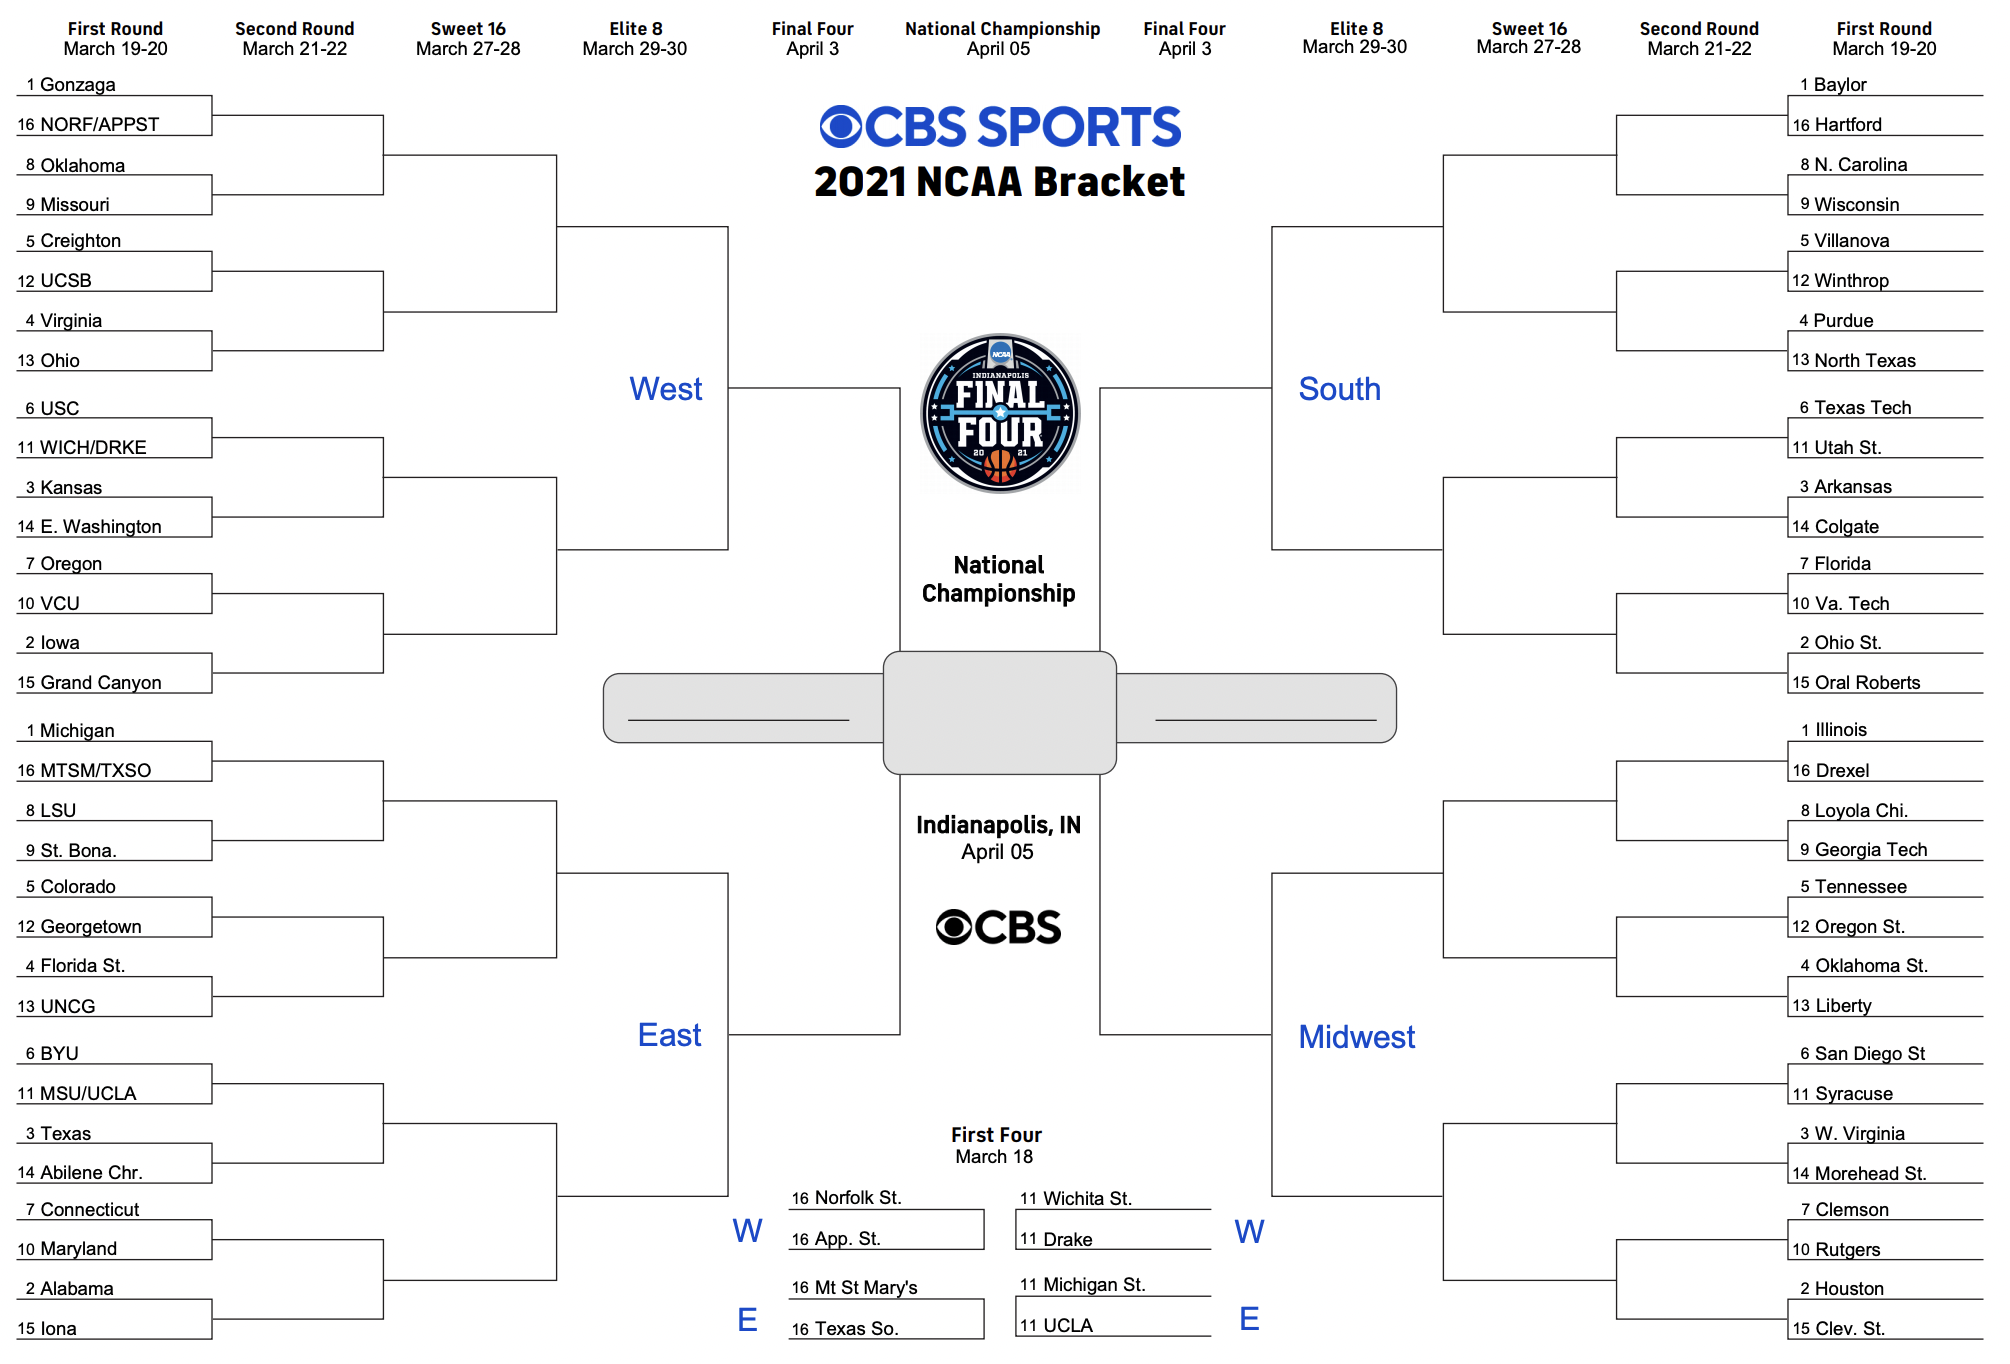

In [ ]:
#main model 1 RANDOM WALK Simulation --> pycharm

In [63]:
#MONTE CARLOS
#main model 2

import random

#fatigue level (in the future maybe with GPS)
#star_coach_ (add 'transportation for team with star player and star coach when they are about to lose or close game')
#audience atmosphere 
#no. of star player in team 
#strategy changed or not
#and the assigned charts
#other probs
def monte_carlo(n):
    x=0
    y=0
    score_a=0
    score_b=0
    violation_a=0
    violation_b=0
    count1=0
    count2=0
    for i in range(n):
        stepa=random.choices([0,2,3],weights=[0.4,0.35,0.25], k=1)[0]
        stepb=random.choices([0,2,3],weights=[0.65,0.3,0.05], k=1)[0]
        ball=True
        while ball & count1<=48:
            if count1==48:
                break
            count1=count1+1
            if stepa == 0:
                temp1=random.choice([0,1])
                violation_a=violation_a+temp1
                ball=False
                score_a=score_a+stepa
                if temp1==1 & violation_a<=6:
                    temp2=random.choice([0,1,2])
                    score_a=score_a+temp2
            elif stepa == 2:
                temp3 = random.choice([0, 1])
                violation_a = violation_a + temp3
                ball = False
                score_a = score_a + stepa
                if temp3 == 1 & violation_a<=6:
                    temp4 = random.choice([0, 1])
                    score_a = score_a + temp4
            else:
                temp5 = random.choice([0, 1])
                violation_a = violation_a + temp5
                ball = False
                score_a = score_a + stepa
                if temp5 == 1 & violation_a<=6:
                    temp6 = random.choice([0, 1])
                    score_a = score_a + temp6
        while ball & count2<=48:
            if count2==48:
                break            
            count2=count2+1
            if stepb == 0:
                tempa=random.choice([0,1])
                violation_b=violation_b+tempa
                ball=False
                score_b = score_b + stepb
                if tempa==1 & violation_b<=6:
                    tempb=random.choice([0,1,2])
                    score_b=score_b+tempb
            elif stepb == 2:
                tempc = random.choice([0, 1])
                violation_b = violation_b + tempc
                ball = False
                score_b = score_b + stepb
                if tempc == 1 & violation_b<=6:
                    tempd = random.choice([0, 1])
                    score_b = score_b + tempd
            else:
                tempe = random.choice([0, 1])
                violation_b = violation_b + tempe
                ball = False
                score_b = score_b + stepb
                if tempe == 1 & violation_b<=6:
                    tempf = random.choice([0, 1])
                    score_b = score_b + tempf
    win=False
    if score_a>score_b:
        win=True
    elif score_a<score_b:
        win=False
    else:
        win=random.choice([True, False])
    if win==True:
        return (score_a, score_b, ' team a won')
    else:
        return (score_a, score_b, ' team b won')
    winsA=0
    winsB=0
    winsA=winsA+1
    winsB=winsB+1

def main():
    for i in range(100):
        walk=monte_carlo(1)
        print(walk)
main()

(24, 158, ' team b won')
(155, 23, ' team a won')
(26, 159, ' team b won')
(108, 19, ' team a won')
(156, 152, ' team a won')
(159, 157, ' team a won')
(155, 157, ' team b won')
(111, 102, ' team a won')
(156, 24, ' team a won')
(160, 154, ' team a won')
(156, 113, ' team a won')
(20, 104, ' team b won')
(158, 154, ' team a won')
(113, 20, ' team a won')
(104, 156, ' team b won')
(108, 27, ' team a won')
(109, 29, ' team a won')
(157, 108, ' team a won')
(21, 30, ' team b won')
(21, 155, ' team b won')
(160, 23, ' team a won')
(158, 107, ' team a won')
(156, 152, ' team a won')
(32, 152, ' team b won')
(158, 23, ' team a won')
(154, 27, ' team a won')
(20, 109, ' team b won')
(156, 109, ' team a won')
(154, 15, ' team a won')
(24, 29, ' team b won')
(155, 161, ' team b won')
(24, 158, ' team b won')
(162, 23, ' team a won')
(159, 108, ' team a won')
(112, 151, ' team b won')
(163, 20, ' team a won')
(27, 153, ' team b won')
(109, 41, ' team a won')
(160, 105, ' team a won')
(113, 20, '

In [65]:
#visualization
plt.style.use('fivethirtyeight')

def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()

#########################################

fig, ax = plt.subplots()
fig.set_tight_layout(True)

print('fig size: {0} DPI, size in inches {1}'.format(fig.get_dpi(), fig.get_size_inches()))

x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i + 1)
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=np.arange(0, 10), interval=500)

plt.show()

In [ ]:
#main model 2
#SVM

In [ ]:
#TEST
numberList = [100, 200, 300, 400]
# Choose elements with different probabilities
sampleNumbers = np.random.choice(numberList, 4, p=[0.10, 0.20, 0.30, 0.40])
print(sampleNumbers)
# Output [300 200 300 300]

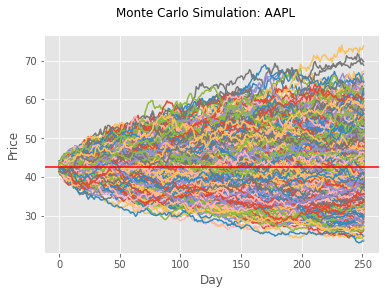

In [34]:
#TEST OF MONTE CARLOS
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

start = dt.datetime(2017, 0o1, 0o3)
end = dt.datetime(2017, 11, 20)

prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']
returns = prices.pct_change()

last_price = prices[-1]

#Number​ of Simulations
num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
    
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [40]:
current_data=pd.read_csv('/Users/GuoJietongPRC/Downloads/NCAA_Tourney_2021.csv')
past_data=pd.read_csv('/Users/GuoJietongPRC/Desktop/MDCM/Games_data.csv')
coach_data=pd.read_csv('/Users/GuoJietongPRC/Desktop/MDCM/Coaches_data.csv')
injury_data=pd.read_csv('/Users/GuoJietongPRC/Desktop/MDCM/Major_injuries.csv')
NET_data=pd.read_csv('/Users/GuoJietongPRC/Desktop/MDCM/NET_RANKING.csv')
star_player=pd.read_csv('/Users/GuoJietongPRC/Desktop/MDCM/star_player.csv')

In [ ]:
#support algo 1
#PageRank
#TR(x) = sum(y -> number of pages point to x) {TR(y)/OutDegree(y)}
#initally
#using L1 L2 regulization to evaluate

In [ ]:
#support algo 2
#multi-lineaer regression with groups (seed 1-4 5-8 9-12 13-16, by fg/fg2/fg3, by coach) and product (create coach * player index)
#using L1 L2 regulization to evaluate
#stata, SAS
#hypothesis testing

In [ ]:
#audience analytics as home advantage (hypothesis that audience color and voice would impact players)

In [ ]:
#statistics (conditional probabolity & white test, heterosketicity for multi-linear regression)

In [ ]:
#PCA

In [ ]:
#limitation and scope

In [ ]:
#visualization (ggplot?)

[3]